In [69]:
import os
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from torchvision import transforms

In [70]:
data_info_path = '/opt/ml/input/ext_data/megaage_asian/list/'

with open(os.path.join(data_info_path, 'train_age.txt'), 'r') as f:
    age_l = list(map(int, f.readlines()))
    
with open(os.path.join(data_info_path, 'train_name.txt'), 'r') as f:
    name_l = [s.strip() for s in f.readlines()]

In [ ]:
from PIL import Image

In [ ]:
def query1(age):
    if 50 <= age <=  59 :
        return True
    return False

def query2(age):
    if age >= 60 :
        return True
    return False

In [ ]:
q1, q2 = [], []

while len(q1) < 6 or len(q2) < 6:
    age, path = next(iterator)
    if query1(row):
        q1.append(row)
    if query2(row):
        q2.append(row)

fig, axes = plt.subplots(2, 6, figsize=(15, 6))

for ax in axes.flatten():
    ax.axis('off')

for j, q in enumerate([q1, q2]):
    for i, row in enumerate(q[:6]):
        ax = axes[j][i]
        _img_path = os.path.join(img_path, row.path)
        for f in os.listdir(_img_path):
                if f.startswith('normal'):
                    _img_path = os.path.join('/opt/ml/input/ext_data/megaage_asian/train', p)
                    img = Image.open(_img_path)
                    break
        ax.set_title(row.age)
        ax.imshow(img)

plt.show()

In [49]:
len(age_l)

40000

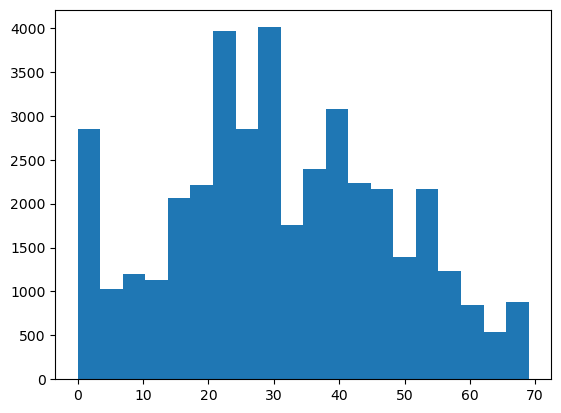

In [50]:
import matplotlib.pyplot as plt

plt.hist(age_l, bins=20)
plt.show()

In [38]:
path, age = [], []

zero_cnt, one_cnt = 0, 0
for a, p in zip(age_l, name_l):
    if a >= 61:
        age.append(2)
        path.append(os.path.join('/opt/ml/input/ext_data/megaage_asian/train', p))
    elif 18 <= a <= 28 and zero_cnt < 2000:
        age.append(0)
        path.append(os.path.join('/opt/ml/input/ext_data/megaage_asian/train', p))
        zero_cnt += 1
    elif 31 <= a <= 58 and one_cnt < 2000:
        age.append(1)
        path.append(os.path.join('/opt/ml/input/ext_data/megaage_asian/train', p))
        one_cnt += 1

5815 5815


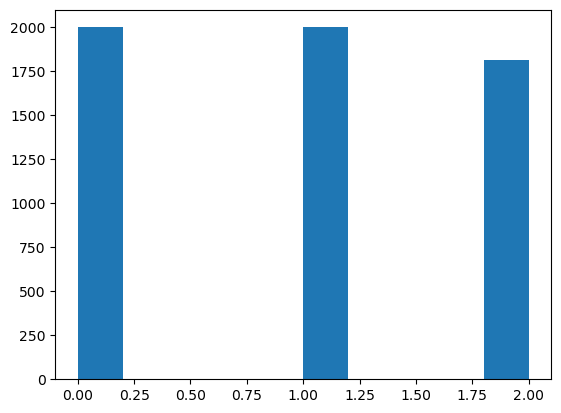

In [40]:
print(len(path), len(age))

plt.hist(age)
plt.show()

In [46]:
df = pd.read_csv('df_megaasian_2000.csv')
df

,path,age
0,/opt/ml/input/ext_data/megaage_asian/train/1.jpg,0
1,/opt/ml/input/ext_data/megaage_asian/train/8.jpg,0
2,/opt/ml/input/ext_data/megaage_asian/train/9.jpg,0
3,/opt/ml/input/ext_data/megaage_asian/train/10.jpg,1
4,/opt/ml/input/ext_data/megaage_asian/train/11.jpg,0
...,...,...
5810,/opt/ml/input/ext_data/megaage_asian/train/399...,2
5811,/opt/ml/input/ext_data/megaage_asian/train/399...,2
5812,/opt/ml/input/ext_data/megaage_asian/train/399...,2
5813,/opt/ml/input/ext_data/megaage_asian/train/399...,2


In [52]:
from dataset import get_dataset

In [53]:
df_valid = pd.read_csv('df_valid.csv')
df_test = pd.read_csv('/opt/ml/input/data/eval/info.csv')
train_dataset, valid_dataset, test_dataset = get_dataset(df, df_valid, df_test, target='age')

In [54]:
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

In [56]:
train_dataset[0]

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

In [59]:
import torch

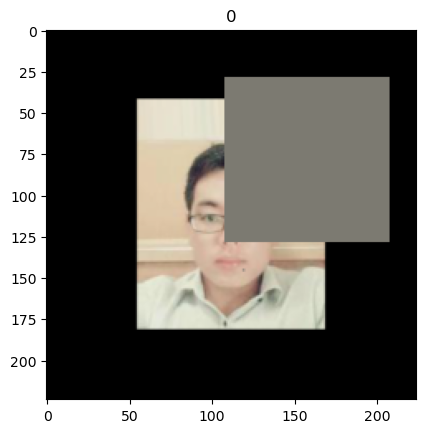

In [68]:
inputs, age_ = train_dataset[np.random.randint(0, len(train_dataset)-1)]

# with torch.no_grad():
#     inputs = inputs.to('cuda').unsqueeze(0)
#     outputs = model(inputs)
#     _, preds = torch.max(outputs, 1)
        
imshow(inputs, title=age_)
plt.show()